In [2]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import os
import pickle

from HashtagRecommenderModel import HashtagRecommender, split_file, join_file

In [3]:
data_path = 'data'
hr = HashtagRecommender(data_path=data_path)
images_names = hr.images_names
train_images_names, test_images_names = train_test_split(images_names, test_size=0.2, random_state=42)

In [4]:
hr.fit(train_images_names)

In [35]:
hashtags_predictions = hr.predict_hashtags(hr.base_images_path + train_images_names[1], num_neighbors=20, num_predict=5)
hashtags_predictions.values[0]

['love', 'instagood', 'photooftheday', 'instagram', 'follow']

In [8]:
hashtags_predictions = hr.predict_hashtags(hr.base_images_path + train_images_names[1], num_neighbors=20, num_predict=5, selected_hashtags=['nature'])
hashtags_predictions.values[0]

['photooftheday', 'instagood', 'love', 'picoftheday', 'beautiful']

In [14]:
print(hr.full_data.loc[train_images_names[1]].hashtags)

['Canon', 'beautiful', 'flora', 'instagram', 'nature', 'naturephotography', 'photography', 'photooftheday', 'summer']


In [36]:
pickle.dump(hr, open('model.pkl', 'wb'))

In [23]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
def show_results(images_dir, images_names, df):
    img = mpimg.imread(image_path)
    plt.figure(figsize=(9, 9))       
    plt.imshow(img)

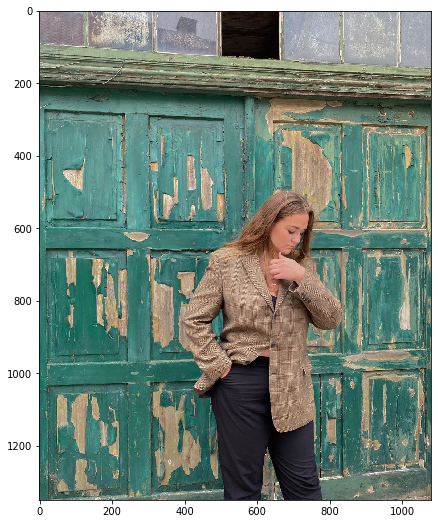

In [24]:
show_results(hr.base_images_path + test_images_names[0])